In [36]:
import tensorflow.keras as tf
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
# # In this case, I'm using two hidden layers, each with sixteen nodes, and one output layer node for either a +ve or -ve output. Hidden is handled by ReLu.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [37]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.9674 - loss: 0.1110 - val_accuracy: 0.9607 - val_loss: 0.1201
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9775 - loss: 0.0877 - val_accuracy: 0.9483 - val_loss: 0.1368
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9868 - loss: 0.0638 - val_accuracy: 0.9398 - val_loss: 0.1540
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9906 - loss: 0.0480 - val_accuracy: 0.9335 - val_loss: 0.1755
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9964 - loss: 0.0314 - val_accuracy: 0.9271 - val_loss: 0.2007
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9970 - loss: 0.0240 - val_accuracy: 0.9207 - val_loss: 0.2274
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9990 - loss: 0.0162 - val_accuracy: 0.9198 - val_loss: 0.2419
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9997 - loss: 0.0115 - val_accuracy: 0.9159 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

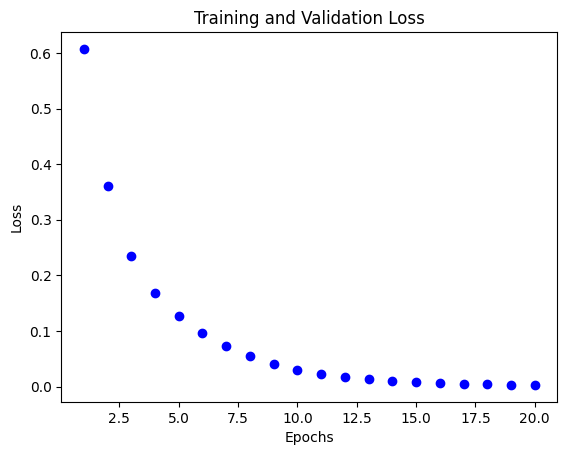

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

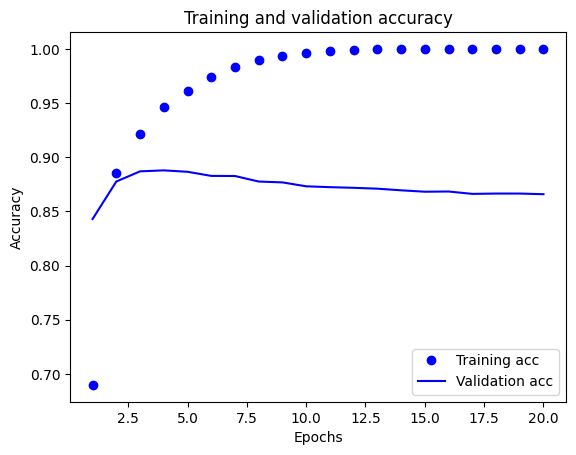

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

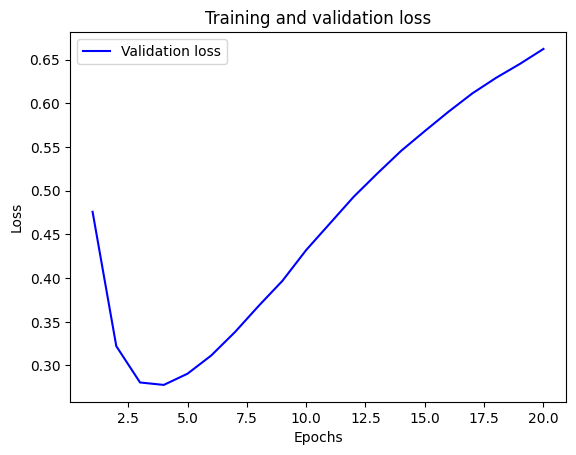

In [16]:
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#To retrain the model, I've chosen three epochs in this instance.
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7332 - loss: 0.5786
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9135 - loss: 0.2545
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9398 - loss: 0.1821
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9529 - loss: 0.1458
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8777 - loss: 0.3124


[0.3111286461353302, 0.8802400231361389]

In [18]:
model1_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [19]:
model1_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [20]:
model1_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model1_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [21]:
history1_1 = model1_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history1_3 = model1_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6966 - loss: 0.5975 - val_accuracy: 0.8623 - val_loss: 0.3838
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9026 - loss: 0.3169 - val_accuracy: 0.8853 - val_loss: 0.3122
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9287 - loss: 0.2394 - val_accuracy: 0.8882 - val_loss: 0.2889
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9439 - loss: 0.1919 - val_accuracy: 0.8894 - val_loss: 0.2801
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9568 - loss: 0.1617 - val_accuracy: 0.8880 - val_loss: 0.2785
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9643 - loss: 0.1369 - val_accuracy: 0.8863 - val_loss: 0.2813
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9705 - loss: 0.1218 - val_accuracy: 0.8863 - val_loss: 0.2862
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9783 - loss: 0.1060 - val_accuracy: 0.8839 - v

In [22]:
# Vectorize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32 NumPy arrays
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Now evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3124
Test Accuracy: 0.8802400231361389


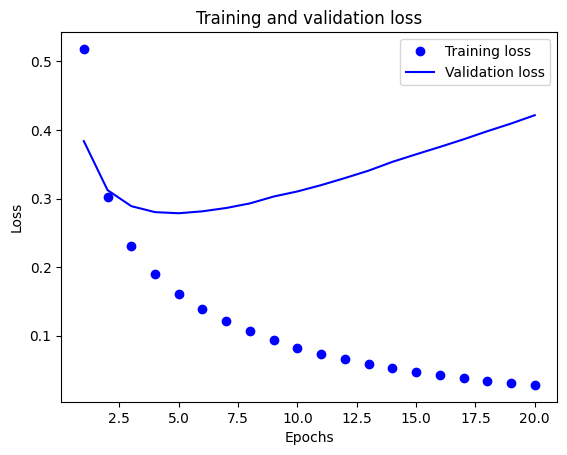

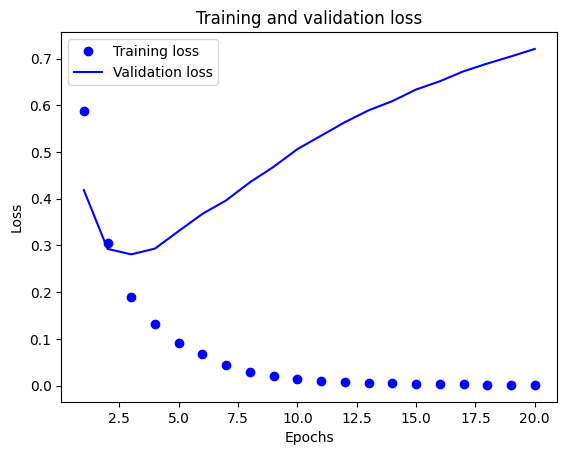

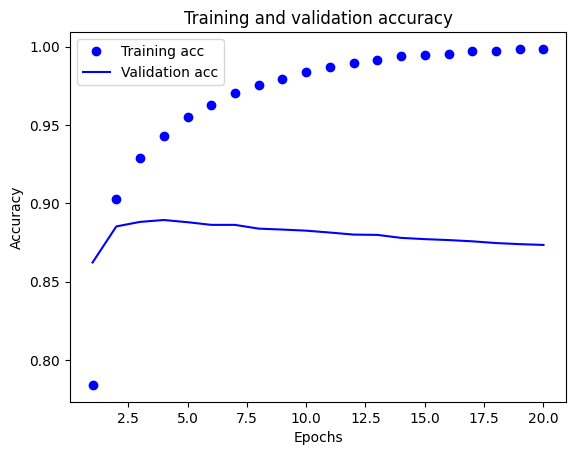

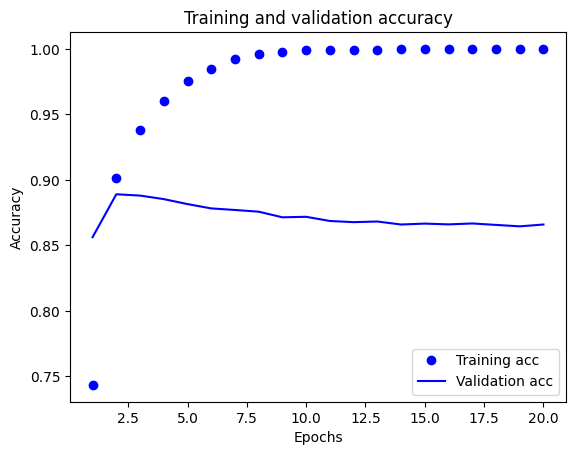

In [23]:
historyp1_1 = history1_1.history
historyp1_1.keys()

historyp1_3 = history1_1.history
historyp1_3.keys()

historyp1_1 = history1_1.history
loss_values1 = historyp1_1["loss"]
val_loss_values1 = historyp1_1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

historyp1_3 = history1_3.history
loss_values3 = historyp1_3["loss"]
val_loss_values3 = historyp1_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc1 = historyp1_1["accuracy"]
val_acc1 = historyp1_1["val_accuracy"]
plt.plot(epochs, acc1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.clf()
acc3 = historyp1_3["accuracy"]
val_acc3 = historyp1_3["val_accuracy"]
plt.plot(epochs, acc3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [24]:
# Vectorize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32 NumPy arrays
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Now evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3124
Test Accuracy: 0.8802400231361389


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.7073 - loss: 0.6170 - val_accuracy: 0.8654 - val_loss: 0.3601
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8993 - loss: 0.2807 - val_accuracy: 0.8904 - val_loss: 0.2775
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9466 - loss: 0.1585 - val_accuracy: 0.8846 - val_loss: 0.3055
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9691 - loss: 0.1067 - val_accuracy: 0.8824 - val_loss: 0.3195
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9827 - loss: 0.0690 - val_accuracy: 0.8779 - val_loss: 0.3663
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9939 - loss: 0.0395 - val_accuracy: 0.8751 - val_loss: 0.4205
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9978 - loss: 0.0237 - val_accuracy: 0.8720 - val_loss: 0.4698
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9995 - loss: 0.0125 - val_accuracy: 0.8693 - 

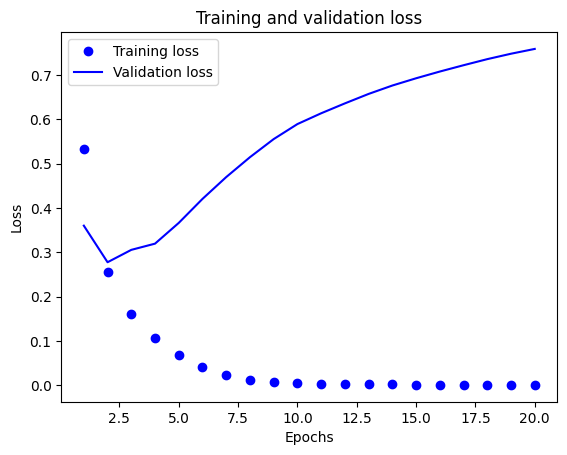

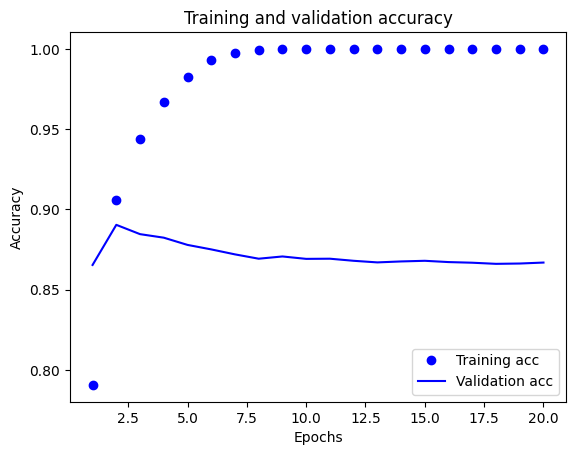

In [25]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

histp2 = hist2.history
loss_values = histp2["loss"]
val_loss_values = histp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp2["accuracy"]
val_acc = histp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
# Vectorize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32 NumPy arrays
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Now evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3124
Test Accuracy: 0.8802400231361389


In [27]:
model3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6337 - loss: 0.2311 - val_accuracy: 0.8520 - val_loss: 0.1457
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8866 - loss: 0.1164 - val_accuracy: 0.8846 - val_loss: 0.0956
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9316 - loss: 0.0667 - val_accuracy: 0.8888 - val_loss: 0.0855
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9522 - loss: 0.0485 - val_accuracy: 0.8884 - val_loss: 0.0832
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9688 - loss: 0.0354 - val_accuracy: 0.8854 - val_loss: 0.0840
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9803 - loss: 0.0253 - val_accuracy: 0.8827 - val_loss: 0.0851
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9859 - loss: 0.0199 - val_accuracy: 0.8793 - val_loss: 0.0880
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9903 - loss: 0.0144 - val_accuracy: 0.8773 - v

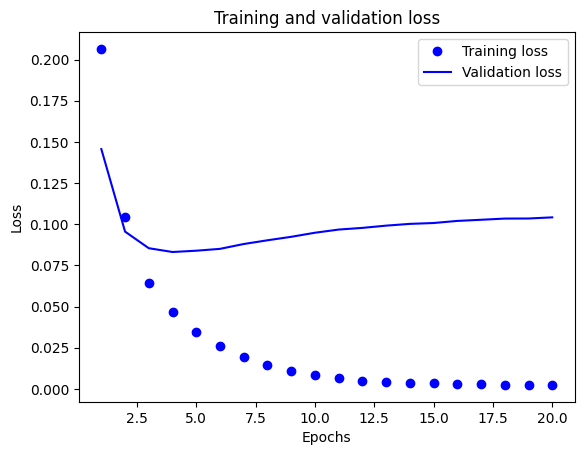

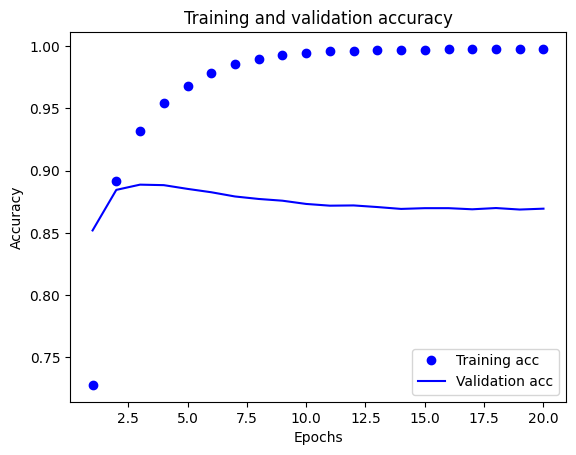

In [28]:
model3.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

hist3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

histp3 = hist3.history
loss_values = histp3["loss"]
val_loss_values = histp3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp3["accuracy"]
val_acc = histp3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
# Vectorize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32 NumPy arrays
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Now evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3124
Test Accuracy: 0.8802400231361389


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.7169 - loss: 0.1969 - val_accuracy: 0.8654 - val_loss: 0.1090
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9120 - loss: 0.0814 - val_accuracy: 0.8879 - val_loss: 0.0865
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9450 - loss: 0.0508 - val_accuracy: 0.8891 - val_loss: 0.0831
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9680 - loss: 0.0345 - val_accuracy: 0.8863 - val_loss: 0.0843
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9805 - loss: 0.0245 - val_accuracy: 0.8793 - val_loss: 0.0875
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9863 - loss: 0.0186 - val_accuracy: 0.8783 - val_loss: 0.0904
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9904 - loss: 0.0137 - val_accuracy: 0.8758 - val_loss: 0.0939
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9918 - loss: 0.0115 - val_accuracy: 0.8732 - v

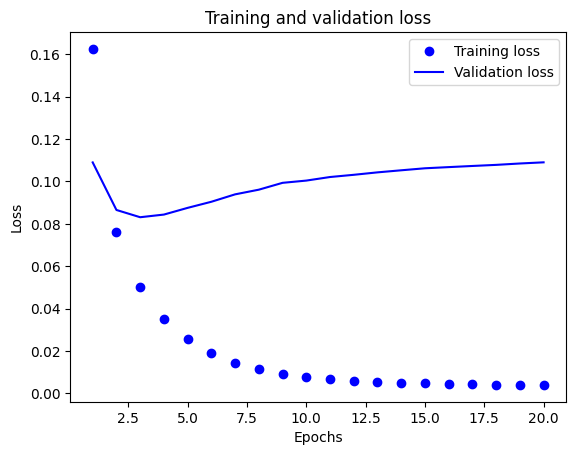

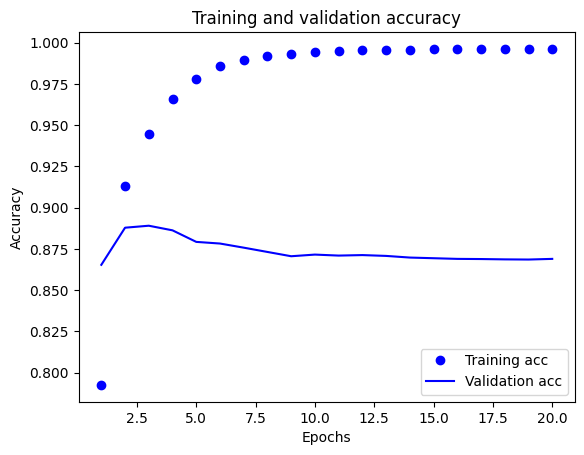

In [30]:
model4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model4.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

hist4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

histp4 = hist4.history
loss_values = histp4["loss"]
val_loss_values = histp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp4["accuracy"]
val_acc = histp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [31]:
# Vectorize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32 NumPy arrays
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Now evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8777 - loss: 0.3124
Test Accuracy: 0.8802400231361389


In [32]:
from tensorflow import keras
from tensorflow.keras import layers
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model5.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.5828 - loss: 0.6735 - val_accuracy: 0.8299 - val_loss: 0.5633
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7682 - loss: 0.5370 - val_accuracy: 0.8657 - val_loss: 0.4382
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8464 - loss: 0.4098 - val_accuracy: 0.8833 - val_loss: 0.3416
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8893 - loss: 0.3212 - val_accuracy: 0.8886 - val_loss: 0.2961
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9131 - loss: 0.2613 - val_accuracy: 0.8895 - val_loss: 0.2832
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9310 - loss: 0.2125 - val_accuracy: 0.8898 - val_loss: 0.2787
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9400 - loss: 0.1840 - val_accuracy: 0.8886 - val_loss: 0.2789
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9525 - loss: 0.1576 - val_accuracy: 0.8878 - 

In [33]:
# Vectorize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32 NumPy arrays
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Now evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8777 - loss: 0.3124
Test Accuracy: 0.8802400231361389
